In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def SGD_momentum_cubic(w_start=4.0,lr=0.01,p=0,num_epochs=10):
    v = 0
    momentum = p
    eta = lr
    w = torch.tensor([[float(w_start)]],requires_grad=True)
    
    W = torch.linspace(-10,10,1000).type(torch.FloatTensor)
    L = lambda w: w**3
    
    plt.figure(figsize=(10,8),num=1)
    plt.plot(W.numpy(),L(W).numpy())
    
    parameter = []
    Loss = []
    for _ in range(num_epochs):
        loss = L(w)
        loss.backward()
        
        parameter.append(w.data.clone())
        Loss.append(loss.data.clone())
        
        with torch.no_grad():
            v = momentum * v + w.grad
            w -= lr*v
            w.grad.zero_()    
    
    plt.plot(parameter,Loss,'ro')
    plt.xlabel("w parameter",weight="bold",fontsize=20)
    plt.ylabel("Loss function L(w)",weight="bold",fontsize=20)
    plt.title("SGD with momentum={}".format(p),fontsize=30)
    plt.show()

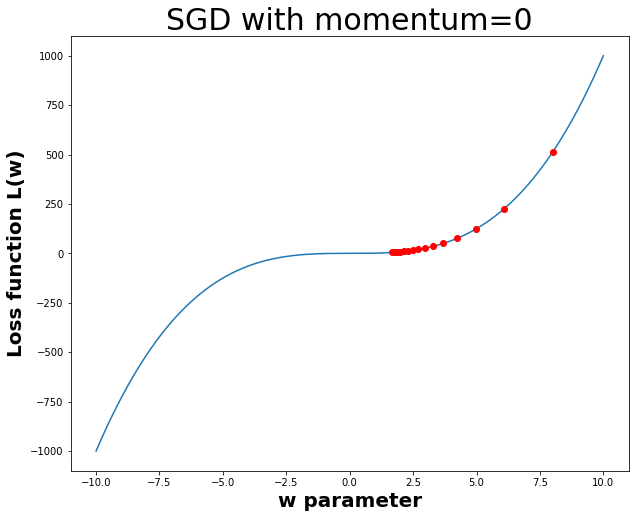

In [130]:
SGD_momentum_cubic(8.0,p=0,num_epochs=15)

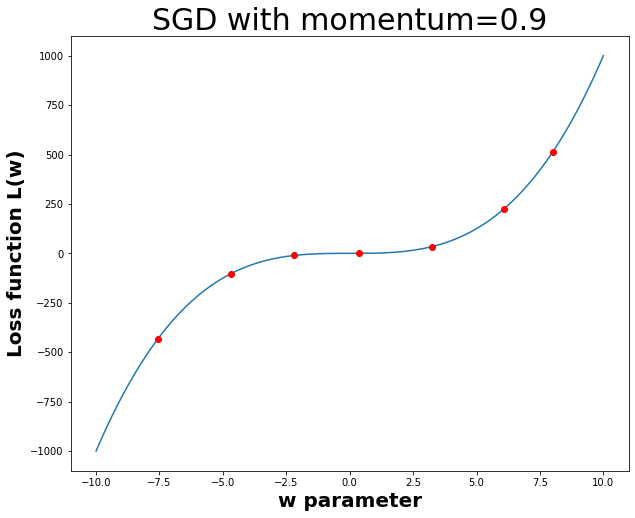

In [131]:
SGD_momentum_cubic(8.0,p=.9,num_epochs=7)

In [134]:
def SGD_momentum_fourth_order(w_start=4.0,lr=0.01,p=0,num_epochs=10):
    v = 0
    momentum = p
    eta = lr
    w = torch.tensor([[float(w_start)]],requires_grad=True)
    
    W = torch.linspace(-4,6,1000).type(torch.FloatTensor)
    L = lambda w: 2 * (w ** 4) - 9 * (w ** 3) - 21 * (w ** 2) + 88 * w + 48
    
    plt.figure(figsize=(10,8),num=1)
    plt.plot(W.numpy(),L(W).numpy())
    
    parameter = []
    Loss = []
    for _ in range(num_epochs):
        loss = L(w)
        loss.backward()
        
        parameter.append(w.data.clone())
        Loss.append(loss.data.clone())
        
        with torch.no_grad():
            v = momentum * v + w.grad
            w -= lr*v
            w.grad.zero_()    
    
    plt.plot(parameter,Loss,'ro')
    plt.xlabel("w parameter",weight="bold",fontsize=20)
    plt.ylabel("Loss function L(w)",weight="bold",fontsize=20)
    plt.title("SGD with momentum={}".format(p),fontsize=30)
    plt.show()

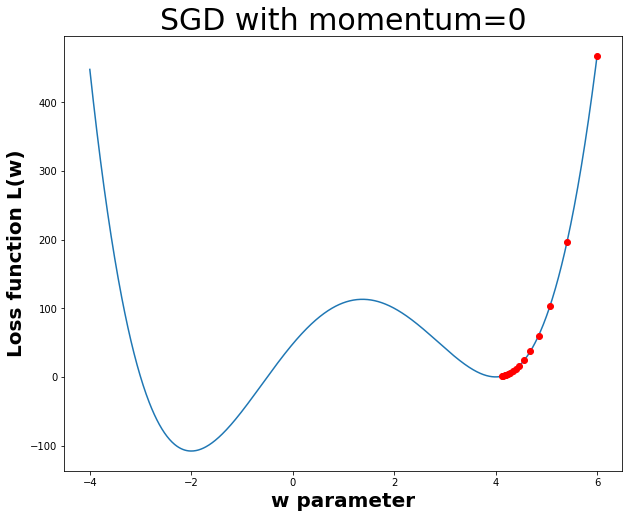

In [138]:
SGD_momentum_fourth_order(w_start=6,lr=0.001,p=0,num_epochs=15)

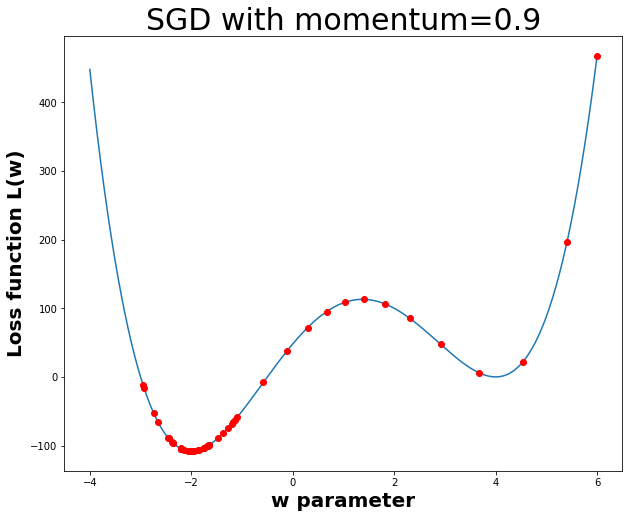

In [147]:
SGD_momentum_fourth_order(w_start=6,lr=0.001,p=.9,num_epochs=50)